In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

![title](eccentricity_graph.png)

In [2]:
graph = nx.Graph()

# graph.add_nodes_from(["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l"])
# graph.add_edges_from([("a", "b"), ("a", "e"),
#                       ("b", "c"), ("b", "g"),
#                       ("c", "d"), ("c", "g"),
#                       ("d", "h"), 
#                       ("e", "f"), ("e", "g"), ("e", "i"), 
#                       ("g", "h"), ("g", "j"), 
#                       ("h", "k"), ("h", "l"), 
#                       ("i", "j"), 
#                       ("j", "k")])

In [3]:
# print(nx.to_numpy_matrix(graph, ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l"]))

In [4]:
adj_mat = np.matrix([
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
    [1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0], 
    [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], 
    [0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], 
    [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0], 
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], 
    [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0], 
    [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], 
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], 
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
])

In [5]:
labels = { 0 : "a", 1: "b", 2 : "c", 3: "d", 4 : "e", 5: "f", 6 : "g", 7: "h", 8 : "i", 9 : "j", 10 : "k", 11 : "l" }

In [6]:
graph = nx.from_numpy_matrix(adj_mat, create_using=nx.Graph)

In [7]:
graph = nx.relabel_nodes(graph, labels)

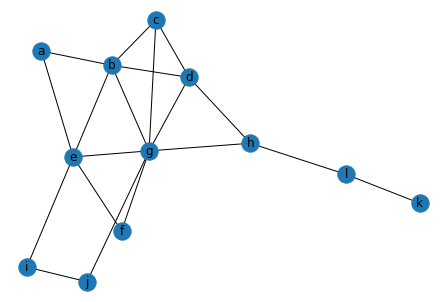

In [8]:
nx.draw(graph, with_labels = True)
plt.show()

### Eccentricity of all nodes

In [9]:
shortest_path_length = dict(nx.shortest_path_length(graph))

In [10]:
all_path_lengths = {}

for s in graph.nodes:
    path_lengths = []
    for t in graph.nodes:
        if nx.has_path(graph, source=s, target=t):
            path_lengths.append(shortest_path_length[s][t])
        else:
            path_lengths.append(0)
            
    all_path_lengths[s] = path_lengths


eccentricity_of_nodes = []
for key in sorted(all_path_lengths):
    print(key, np.max(all_path_lengths[key]))
    eccentricity_of_nodes.append(np.max(all_path_lengths[key]))

a 5
b 4
c 4
d 3
e 4
f 4
g 3
h 3
i 5
j 4
k 5
l 4


### Radius of graph

In [11]:
print(np.min(eccentricity_of_nodes))

3


### Diameter of graph 

In [12]:
print(np.max(eccentricity_of_nodes))

5
